In [286]:
import skfmm
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from scipy.ndimage import distance_transform_edt

# Model Specifications

In [287]:
v0 = 2.  # Velocity at the origin of the model
vergrad = 0.6  # Vertical gradient
horgrad = 0.1  # Horizontal gradient

zmin = 0.; zmax = 6.; deltaz = 0.05
xmin = 0.; xmax = 6.; deltax = 0.05

# Point-source location
num_points = 8  # Number of source points
radius = 2  # Radius of the circle

In [288]:
# Creating grid
z = np.arange(zmin, zmax + deltaz, deltaz)
nz = z.size

x = np.arange(xmin, xmax + deltax, deltax)
nx = x.size

# Model layer
Z, X = np.meshgrid(z, x, indexing='ij')

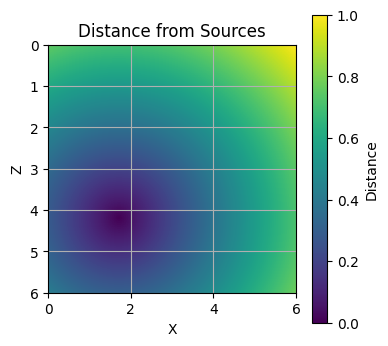

In [289]:
# Initialize distance array
phi = np.ones((nz, nx)) * np.inf

# Create circular velocity model
center_x = (xmax - xmin) / 2
center_z = (zmax - zmin) / 2

# Create mesh of sources distributed along the boundary of the circle
theta = np.linspace(0, 2*np.pi, num_points, endpoint=False)
sx = center_x + radius * np.cos(theta)
sz = center_z + radius * np.sin(theta)

# Iterate through phi array and calculate distances
for i in range(nz):
  for j in range(nx):
    distance = np.sqrt((z[i] - z[34])**2 + (x[j] - x[84])**2)
    phi[j, i] = distance

# sources = [(int(np.round((sx[i] - xmin) / (xmax - xmin) * (nx - 1))),
#             int(np.round((sz[i] - zmin) / (zmax - zmin) * (nz - 1)))) for i in range(num_points)]
sources = [[34, 84]]

# Calculate distance from each grid point to the nearest source
# for i in range(nz):
#     for j in range(nx):
#         min_dist = np.inf
#         for source in sources:
#             dist = np.sqrt((i - source[1])**2 + (j - source[0])**2)
#             if dist < min_dist:
#                 min_dist = dist
#         phi[i, j] = min_dist

for source in sources:
    phi[source[1], source[0]] = 0

phi /= np.max(phi)

plt.figure(figsize=(4, 4))
plt.imshow(phi, cmap='viridis', extent=[xmin, xmax, zmax, zmin])
plt.colorbar(label='Distance')
plt.title('Distance from Sources')
plt.xlabel('X')
plt.ylabel('Z')
plt.grid(True)
plt.show()

# Velocity

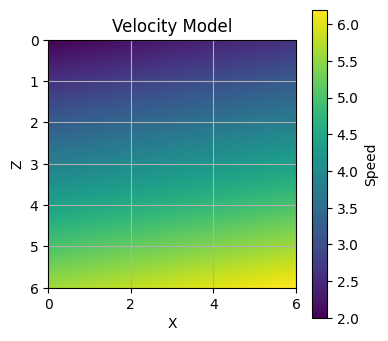

In [290]:
# Define velocity model with two layers
speed = np.ones((nz, nx)) # Initialize velocity model array

speed = 2 + vergrad * (Z - 0.) + horgrad * (X - 0.)
plt.figure(figsize=(4, 4))
plt.imshow(speed, cmap='viridis', extent=[xmin, xmax, zmax, zmin])
plt.colorbar(label='Speed')
plt.title('Velocity Model')
plt.xlabel('X')
plt.ylabel('Z')
plt.grid(True)
plt.show()


In [291]:
t    = skfmm.travel_time(phi, speed, dx=0.002)

In [292]:
np.save('../experiences/fsm_output/cirNS.npy', t)